# 1,Performance testing with two Basic Datasets

In [1]:
import numpy as np
import pandas as pd

def get_accuracy_bandit(fp, best_arm_indexes):
    df = pd.read_csv(fp)
    df = df[['num_sims', 'horizon', 'chosen_arm']]
    
    n_simulations = int(np.max(df['num_sims'])) + 1
    time_horizon = int(np.max(df['horizon'])) + 1
    
    best_arms = np.zeros((n_simulations, time_horizon))  
    
    for n in range(n_simulations):
        data = np.array(df.loc[df['num_sims'] == n]['chosen_arm'])
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            best_arms[n, t] = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
    

    isinfunc = lambda x: x in best_arm_indexes
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms).astype(int)  

    probs_mean = boo.mean(axis=0)
    probs_var = boo.var(axis=0)

    return probs_mean, probs_var
fp = r'C:\Users\Administrator\Desktop\supply data\Basic experiment\bandit\deoxyfluorination_bayes_ucb_gaussian\log.csv'
deoxyf, deoxyf_var= get_accuracy_bandit(fp, best_arm_indexes=[14, 19])
print(deoxyf)
print(deoxyf_var)


[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.0775 0.0725 0.0775 0.0475 0.04   0.0875
 0.21   0.1925 0.2225 0.2375 0.23   0.235  0.2875 0.285  0.2875 0.2775
 0.3225 0.33   0.33   0.3425 0.38   0.3925 0.4025 0.42   0.415  0.42
 0.4425 0.4275 0.435  0.44   0.4425 0.4275 0.4275 0.45   0.46   0.4675
 0.4975 0.4925 0.5025 0.515  0.515  0.52   0.52   0.5225 0.5375 0.525
 0.5475 0.5575 0.555  0.55   0.5375 0.535  0.5525 0.56   0.585  0.59
 0.6025 0.6075 0.59   0.5975 0.6025 0.605  0.615  0.615  0.6125 0.6325
 0.6325 0.635  0.635  0.6375 0.6425 0.655  0.655  0.6575 0.6525 0.665
 0.675  0.6775 0.6775 0.675  0.6825 0.6925 0.695  0.715  0.715  0.7175]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.07149375 0.06724375 0.07149375 0.04524375
 0.0384     0.07984375 0.1659     0.15544375 0.17299375 0.18109375
 0.1771     0.179775   0.20484375 0.203775   0.

In [3]:
import numpy as np
import pandas as pd

def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]

    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()

    best_arms = np.empty((n_simulations, time_horizon), dtype=object)

    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition

    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms).astype(int)  # True -> 1, False -> 0

    boo_df = pd.DataFrame(boo)

    probs_mean = boo_df.mean(axis=0)
    probs_var = boo_df.var(axis=0)

    return probs_mean, probs_var
best_conditions=['BTMG+PBSF','BTPP+PBSF']
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Deoxyfluorination\results\Gaussian_process_history_400_Morgan.csv'
deoxyf_gaussian,deoxyf_gaussian_var=get_accuracy_bandit_model(fp, best_conditions)
print(deoxyf_gaussian)
print(deoxyf_gaussian_var)

0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
95    0.7875
96    0.7875
97    0.7925
98    0.7900
99    0.7900
Length: 100, dtype: float64
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
        ...   
95    0.167763
96    0.167763
97    0.164856
98    0.166316
99    0.166316
Length: 100, dtype: float64


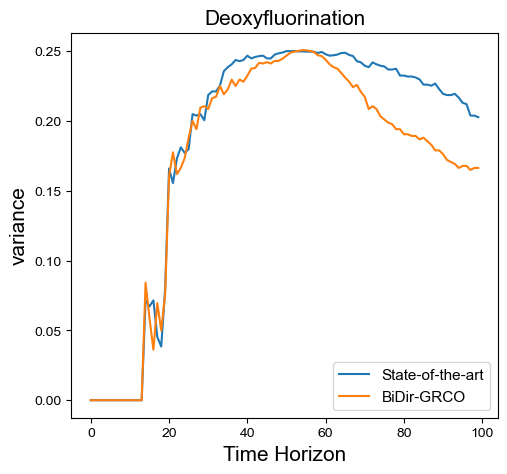

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(5.5, 5))
plt.rcParams['axes.unicode_minus'] = False

# plt.plot(deoxyf, label='deoxyf',color='red')
plt.plot(deoxyf_var,label='State-of-the-art',color='#1f77b4')
# plt.plot(deoxyf_gaussian, label='deoxyf_gaussian',color='red', linestyle='--')
plt.plot(deoxyf_gaussian_var, label='BiDir-GRCO',color='#ff7f0e')
plt.title('Deoxyfluorination', fontsize=15)
# plt.title('Amide Coupling', fontsize=15)

plt.xlabel('Time Horizon', fontsize=15)
plt.ylabel('variance', fontsize=15)
plt.legend(fontsize=11)


plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\supply Figure 1-a.png', dpi=500, bbox_inches='tight', pad_inches=0)

plt.show()

In [13]:
import numpy as np
import pandas as pd

def get_accuracy_bandit(fp, best_arm_indexes):
    df = pd.read_csv(fp)
    df = df[['num_sims', 'horizon', 'chosen_arm']]
    
    n_simulations = int(np.max(df['num_sims'])) + 1
    time_horizon = int(np.max(df['horizon'])) + 1
    
    best_arms = np.zeros((n_simulations, time_horizon))  
    
    for n in range(n_simulations):
        data = np.array(df.loc[df['num_sims'] == n]['chosen_arm'])
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            best_arms[n, t] = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
    

    isinfunc = lambda x: x in best_arm_indexes
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms).astype(int)  

    probs_mean = boo.mean(axis=0)
    probs_var = boo.var(axis=0)

    return probs_mean, probs_var
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\bandit\nickel_borylation_bayes_ucb_beta\log.csv'
nib, nib_var= get_accuracy_bandit(fp, best_arm_indexes=[4, 16, 18])
print(nib)
print(nib_var)


[0.    0.    0.    0.    0.2   0.186 0.14  0.142 0.102 0.1   0.07  0.072
 0.084 0.078 0.078 0.074 0.118 0.114 0.172 0.132 0.158 0.138 0.162 0.052
 0.108 0.158 0.212 0.242 0.292 0.32  0.352 0.352 0.384 0.398 0.386 0.398
 0.43  0.442 0.446 0.446 0.476 0.482 0.502 0.5   0.502 0.522 0.528 0.542
 0.542 0.542 0.558 0.556 0.564 0.574 0.572 0.584 0.6   0.6   0.612 0.632
 0.636 0.636 0.626 0.64  0.628 0.64  0.638 0.642 0.652 0.638 0.658 0.66
 0.67  0.666 0.674 0.674 0.682 0.68  0.678 0.692 0.69  0.698 0.692 0.708
 0.712 0.72  0.712 0.712 0.726 0.734 0.734 0.734 0.73  0.742 0.742 0.742
 0.752 0.748 0.756 0.758]
[0.       0.       0.       0.       0.16     0.151404 0.1204   0.121836
 0.091596 0.09     0.0651   0.066816 0.076944 0.071916 0.071916 0.068524
 0.104076 0.101004 0.142416 0.114576 0.133036 0.118956 0.135756 0.049296
 0.096336 0.133036 0.167056 0.183436 0.206736 0.2176   0.228096 0.228096
 0.236544 0.239596 0.237004 0.239596 0.2451   0.246636 0.247084 0.247084
 0.249424 0.249676 0.24999

In [17]:
import numpy as np
import pandas as pd

def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]

    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()

    best_arms = np.empty((n_simulations, time_horizon), dtype=object)

    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition

    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms).astype(int)  # True -> 1, False -> 0

    boo_df = pd.DataFrame(boo)

    probs_mean = boo_df.mean(axis=0)
    probs_var = boo_df.var(axis=0)

    return probs_mean, probs_var

best_conditions=['Cy-JohnPhos','P(p-Anis)3','PPh2Cy']
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Ni-catalyzed borylation\results\svm_history_500_mordred_beta.csv'
nib_gaussian,nib_gaussian_var=get_accuracy_bandit_model(fp, best_conditions)
print(nib_gaussian)
print(nib_gaussian_var)

0     0.000
1     0.000
2     0.000
3     0.000
4     0.216
      ...  
95    0.904
96    0.900
97    0.898
98    0.914
99    0.912
Length: 100, dtype: float64
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.169683
        ...   
95    0.086958
96    0.090180
97    0.091780
98    0.078762
99    0.080417
Length: 100, dtype: float64


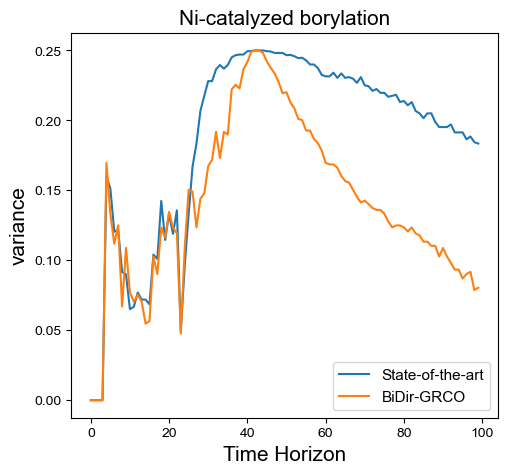

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(5.5, 5))
plt.rcParams['axes.unicode_minus'] = False


plt.plot(nib_var,label='State-of-the-art',color='#1f77b4')

plt.plot(nib_gaussian_var, label='BiDir-GRCO',color='#ff7f0e')

plt.title('Ni-catalyzed borylation', fontsize=15)
plt.xlabel('Time Horizon', fontsize=15)
plt.ylabel('variance', fontsize=15)
plt.legend(fontsize=11)


plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\supply Figure 1-b.png', dpi=500, bbox_inches='tight', pad_inches=0)

plt.show()

# 2,C–N Cross-Coupling Reaction Dataset

In [32]:
import numpy as np
import pandas as pd

def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]

    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()

    best_arms = np.empty((n_simulations, time_horizon), dtype=object)

    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition

    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms).astype(int)  # True -> 1, False -> 0

    boo_df = pd.DataFrame(boo)

    probs_mean = boo_df.mean(axis=0)
    probs_var = boo_df.var(axis=0)

    return probs_mean, probs_var
best_conditions = ['MTBD+tBuXPhos', 'MTBD+tBuBrettPhos', 'MTBD+AdBrettPhos']
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\decision_tree_history_500_EI.csv'
cn,cn_var=get_accuracy_bandit_model(fp,best_conditions)
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\MAB\BayesUCBGaussian.csv'
cn_baye,cn_baye_var=get_accuracy_bandit_model(fp,best_conditions)
print(cn)
print(cn_var)
print(cn_baye)
print(cn_baye_var)

0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.072
10    0.184
11    0.266
12    0.682
13    0.576
14    0.582
15    0.632
16    0.674
17    0.676
18    0.678
19    0.666
20    0.670
21    0.694
22    0.704
23    0.750
24    0.740
25    0.734
26    0.750
27    0.762
28    0.766
29    0.778
30    0.780
31    0.788
32    0.798
33    0.808
34    0.816
35    0.826
36    0.832
37    0.840
38    0.856
39    0.862
40    0.870
41    0.862
42    0.876
43    0.874
44    0.882
45    0.894
46    0.894
47    0.904
48    0.906
49    0.912
dtype: float64
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.066950
10    0.150445
11    0.195635
12    0.217311
13    0.244713
14    0.243764
15    0.233042
16    0.220164
17    0.219463
18    0.218754
19    0.222890
20    0.221543
21    0.212790
22    0.208802
23    0.187876
24    0.192786
25    0.19

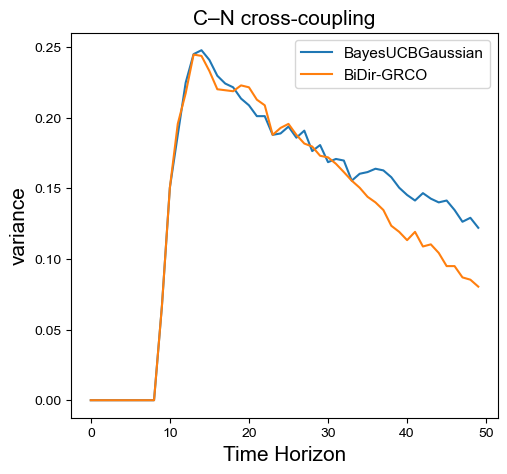

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(5.5, 5))
plt.rcParams['axes.unicode_minus'] = False

# plt.plot(cn, label='BiDir-GRCO',color='#ff7f0e', linestyle='--')
# plt.plot(cn_baye, label='BayesUCBGaussian',color='#1f77b4', linestyle='--')
plt.plot(cn_baye_var,label='BayesUCBGaussian',color='#1f77b4')

plt.plot(cn_var, label='BiDir-GRCO',color='#ff7f0e')

plt.title('C–N cross-coupling', fontsize=15)
plt.xlabel('Time Horizon', fontsize=15)
plt.ylabel('variance', fontsize=15)
plt.legend(fontsize=11)


plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\supply Figure 2.png', dpi=500, bbox_inches='tight', pad_inches=0)

plt.show()

# 3,Amide Coupling Reaction Dataset

In [27]:
import pandas as pd
import numpy as np
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    
    for sim in range(1, n_simulations + 1):
        data = df[df['sim'] == sim]['condition'].values
        for t in range(len(data)):
            u, counts = np.unique(data[:t + 1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    probs = boo.sum(axis=0) / n_simulations
    return probs


best_conditions = ['2,6-Lutidine+THF+TCFH', 'N-methylmorpholine+MeCN+TCFH', 'N-methylmorpholine+DMF+DPPCl']
algos=['Random','Exploit','EpsilonGreedy','ETC','ThompsonSamplingBeta','Pursuit', 'ThompsonSamplingGaussian','UCB1', 'BayesUCBBeta','BayesUCBGaussian' ]
path=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results\MAB'
cns=[]
for algo in algos:
    fp = path+f'\{algo}.csv'
    probs = get_accuracy_bandit_model(fp, best_conditions)
    cns.append(probs)
    print(f"Accuracy for {algo}: {probs}")
    

Accuracy for Random: [0.028 0.02  0.028 0.024 0.038 0.028 0.024 0.028 0.018 0.02  0.028 0.022
 0.016 0.028 0.018 0.034 0.01  0.02  0.024 0.024 0.036 0.026 0.042 0.036
 0.034 0.03  0.028 0.036 0.032 0.028 0.044 0.038 0.03  0.038 0.028 0.032
 0.036 0.042 0.04  0.026 0.04  0.036 0.036 0.034 0.032 0.04  0.032 0.038
 0.036 0.022 0.038 0.034 0.03  0.034 0.036 0.024 0.026 0.034 0.028 0.022
 0.036 0.034 0.032 0.018 0.028 0.03  0.04  0.036 0.034 0.016 0.042 0.022
 0.024 0.018 0.03  0.036 0.026 0.032 0.036 0.03  0.024 0.024 0.036 0.03
 0.02  0.032 0.03  0.028 0.024 0.028 0.028 0.028 0.036 0.038 0.038 0.036
 0.026 0.03  0.034 0.034 0.04  0.02  0.032 0.038 0.038 0.026 0.024 0.022
 0.028 0.018 0.02  0.034 0.026 0.024 0.03  0.036 0.032 0.028 0.028 0.022
 0.022 0.03  0.026 0.036 0.02  0.022 0.024 0.032 0.018 0.022 0.03  0.026
 0.022 0.024 0.02  0.024 0.024 0.016 0.024 0.032 0.024 0.022 0.026 0.028
 0.03  0.036 0.03  0.026 0.028 0.028]
Accuracy for Exploit: [0.024 0.024 0.024 0.024 0.024 0.024 0.024 0

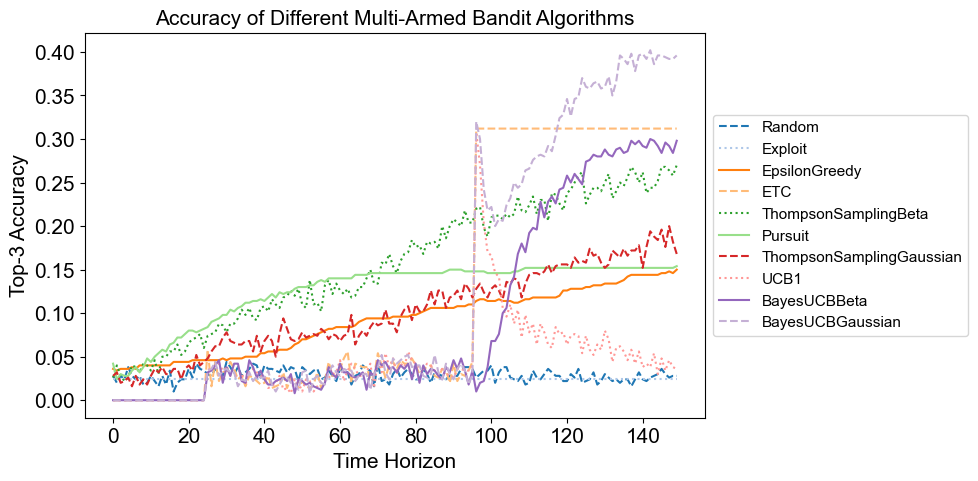

In [28]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))

plt.rcParams['font.sans-serif'] = ['Arial']
colors = plt.cm.tab20(np.linspace(0, 1, 20)) 
linestyles = ['--',':', '-']


for i in range(len(algos)):
    color = colors[i % len(colors)]
    linestyle = linestyles[i % len(linestyles)]
    plt.plot(cns[i], label=algos[i], color=color, linestyle=linestyle)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time Horizon', fontsize=15)
plt.ylabel('Top-3 Accuracy', fontsize=15)    
plt.title('Accuracy of Different Multi-Armed Bandit Algorithms', fontsize=15)  


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)

# plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\supply Figure 3-a.png', 
#             format='png', bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()


In [27]:
import numpy as np
import pandas as pd


def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['2,6-Lutidine+THF+TCFH', 'N-methylmorpholine+MeCN+TCFH', 'N-methylmorpholine+DMF+DPPCl']

random=get_accuracy_bandit_model(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results\MAB\Random.csv', best_conditions)
random


0      0.028
1      0.034
2      0.024
3      0.030
4      0.024
       ...  
145    0.024
146    0.022
147    0.034
148    0.020
149    0.024
Length: 150, dtype: float64

In [28]:
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['2,6-Lutidine+THF+TCFH', 'N-methylmorpholine+MeCN+TCFH', 'N-methylmorpholine+DMF+DPPCl']

BayesUCBGaussian=get_accuracy_bandit_model(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results\MAB\BayesUCBGaussian.csv', best_conditions)
BayesUCBGaussian

0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.368
146    0.392
147    0.384
148    0.378
149    0.378
Length: 150, dtype: float64

In [37]:

import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1):
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['2,6-Lutidine+THF+TCFH', 'N-methylmorpholine+MeCN+TCFH', 'N-methylmorpholine+DMF+DPPCl']

encondings=['One-hot','mordred','CM','EI','Morgan']
models=['svm','Gaussian_process','decision_tree','random_forest','Knn']
cns=[]
path=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results'
for model in models:
    for enconding in encondings:
        cn=get_accuracy_bandit_model(path+f'\{model}_history_500_{enconding}.csv', best_conditions)
        print(f'{model}_{enconding}',cn)
        cns.append(cn)


svm_One-hot 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.458
146    0.454
147    0.450
148    0.436
149    0.450
Length: 150, dtype: float64
svm_mordred 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.650
146    0.670
147    0.676
148    0.650
149    0.676
Length: 150, dtype: float64
svm_CM 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.294
146    0.308
147    0.320
148    0.304
149    0.318
Length: 150, dtype: float64
svm_EI 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.150
146    0.160
147    0.174
148    0.144
149    0.176
Length: 150, dtype: float64
svm_Morgan 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.360
146    0.374
147    0.368
148    0.384
149    0.374
Length: 150, dtype: float64
Gaussian_process_One-hot 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
      

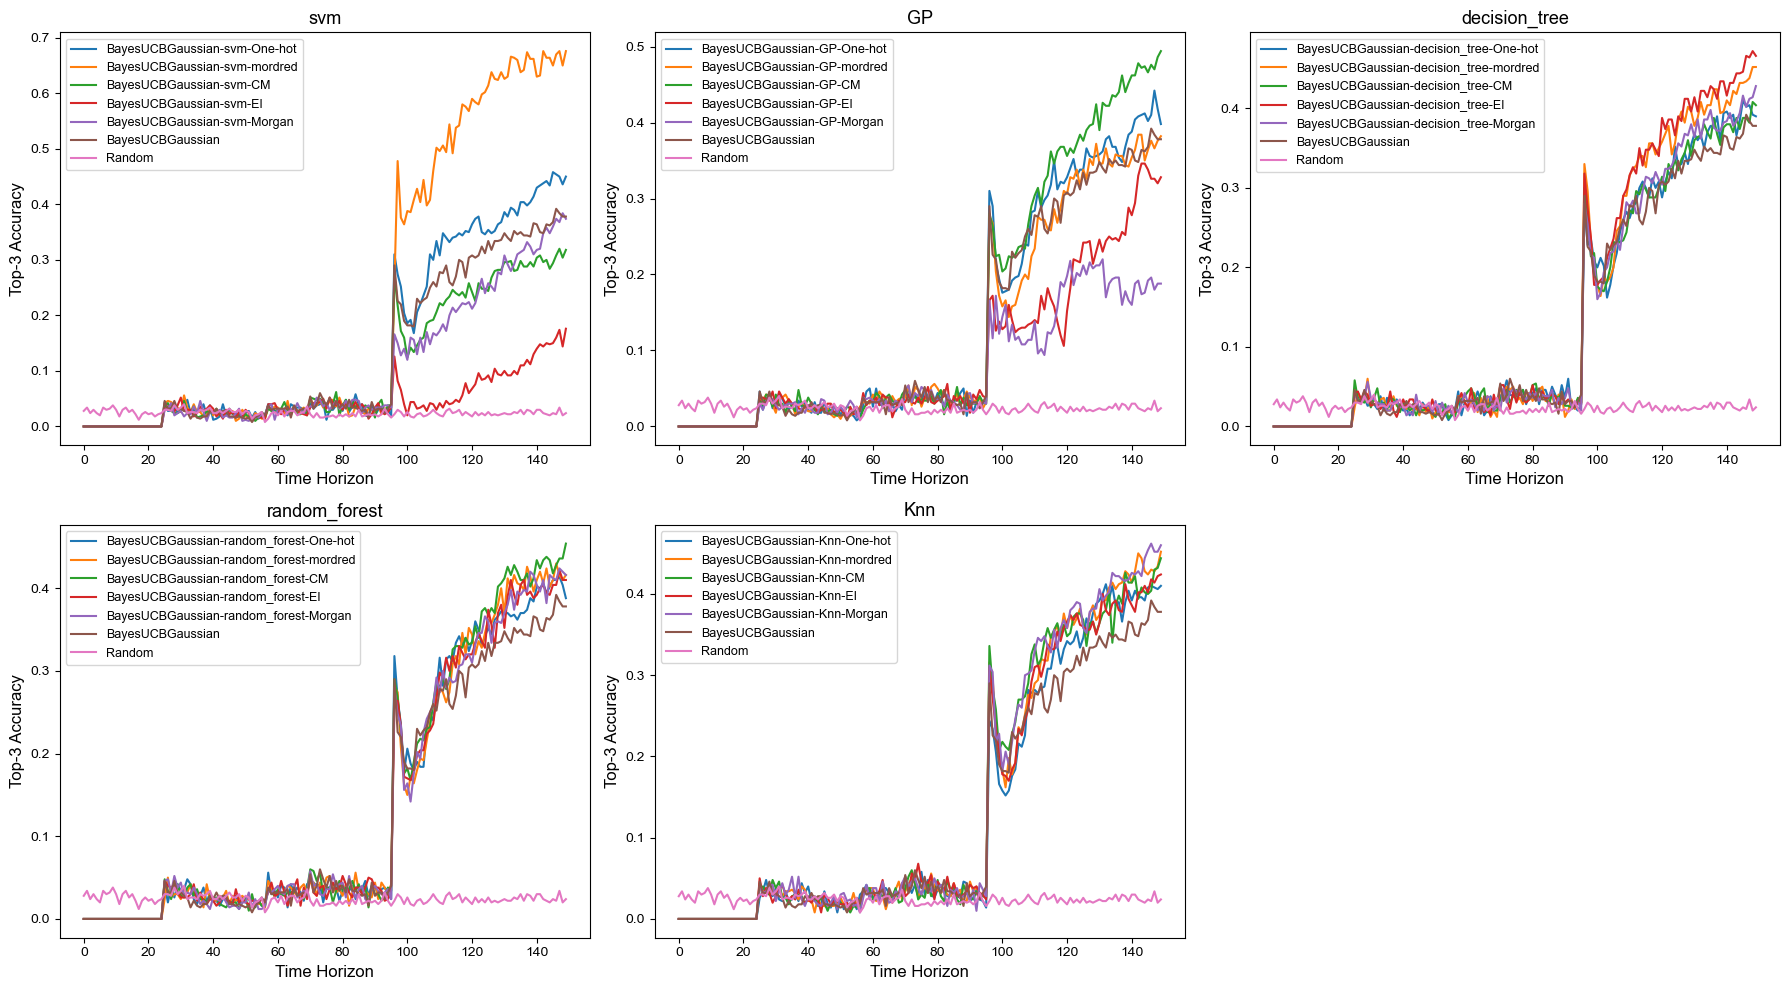

In [43]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

models = ['svm', 'GP', 'decision_tree', 'random_forest', 'Knn']
n_cols = 3
n_rows = (len(models) + n_cols - 1) // n_cols  # 自动计算行数

plt.figure(figsize=(18, 10))  # 你可以根据需要调整宽高

for i in range(len(models)):
    plt.subplot(n_rows, n_cols, i + 1)
    for j in range(len(encondings)):
        plt.plot(cns[i * len(encondings) + j], label=f'BayesUCBGaussian-{models[i]}-{encondings[j]}')
    plt.plot(BayesUCBGaussian, label='BayesUCBGaussian')
    plt.plot(random, label='Random')
    plt.xlabel('Time Horizon', fontsize=12)
    plt.ylabel('Top-3 Accuracy', fontsize=12)
    plt.title(models[i], fontsize=13)
    plt.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\supply Figure 3-b.png', 
            format='png', bbox_inches='tight', pad_inches=0, dpi=500)
